# Prompt 1: Customer Spending Analysis and Sales Regression

**Task**: Analyze the relationship between customer demographics and their spending patterns to help a retail store optimize its sales strategies.

### Data Extraction
- Extract customer transaction data from a **JSON** file using **pandas**.

### Pre-Processing
- **Clean the Data**: Handle missing values, create new features such as average monthly spend, and convert categorical variables (e.g., gender, region) into numerical format.

### Data Summary
- Use **pandas** to generate summary statistics for key metrics (e.g., mean, median of monthly spend).
- **Visualization**:
    - Create histograms of numerical variables.
    - Visualize the distribution of spending relative to the categorical feature variables using boxplots.
    - Calculate pairwise correlations and create a heatmap of the values
    - Generate a scatterplot matrix to show pairwise scatterplots.

### Statistical Modeling
- Use **statsmodels** to build a **multiple linear regression model** to predict customer spending based on demographics (e.g., age, income, region).
- **Interpretation**: Analyze model coefficients to identify key drivers of spending and use the information to make business recommendations.

---

### The data has the following structure.

```
[
    {
        "customer_id": "CUST_1",
        "age": 56,
        "gender": "M",
        "region": "South",
        "income": "$68,900.00",
        "monthly_spend": "$154.82"
    },
    {
        "customer_id": "CUST_2",
        "age": 69,
        "gender": "M",
        "region": "West",
        "income": "$78,300.00",
        "monthly_spend": "$160.97"
    },
    {
        "customer_id": "CUST_3",
        "age": 46,
        "gender": "M",
        "region": "West",
        "income": "$40,000.00",
        "monthly_spend": "$141.76"
    },
    ...
]

```

Run the code block below to store the data as `customers_json`.

In [1]:
# @title
customers_json="""
[
  {
    "customer_id": "CUST_1",
    "age": 56,
    "gender": "M",
    "region": "South",
    "income": "$68,900.00",
    "monthly_spend": "$154.82"
  },
  {
    "customer_id": "CUST_2",
    "age": 69,
    "gender": "M",
    "region": "West",
    "income": "$78,300.00",
    "monthly_spend": "$160.97"
  },
  {
    "customer_id": "CUST_3",
    "age": 46,
    "gender": "M",
    "region": "West",
    "income": "$40,000.00",
    "monthly_spend": "$141.76"
  },
  {
    "customer_id": "CUST_4",
    "age": 32,
    "gender": "M",
    "region": "North",
    "income": "$30,200.00",
    "monthly_spend": "$102.35"
  },
  {
    "customer_id": "CUST_5",
    "age": 60,
    "gender": "M",
    "region": "South",
    "income": "$73,900.00",
    "monthly_spend": "$207.71"
  },
  {
    "customer_id": "CUST_6",
    "age": 25,
    "gender": "F",
    "region": "West",
    "income": "$36,100.00",
    "monthly_spend": "$95.25"
  },
  {
    "customer_id": "CUST_7",
    "age": 38,
    "gender": "M",
    "region": "North",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_8",
    "age": 56,
    "gender": "F",
    "region": "South",
    "income": "$58,300.00",
    "monthly_spend": "$180.21"
  },
  {
    "customer_id": "CUST_9",
    "age": 36,
    "gender": "F",
    "region": "East",
    "income": "$39,600.00",
    "monthly_spend": "$120.70"
  },
  {
    "customer_id": "CUST_10",
    "age": 40,
    "gender": "F",
    "region": "North",
    "income": "$51,200.00",
    "monthly_spend": "$149.48"
  },
  {
    "customer_id": "CUST_11",
    "age": 28,
    "gender": "M",
    "region": "West",
    "income": "$45,500.00",
    "monthly_spend": "$163.53"
  },
  {
    "customer_id": "CUST_12",
    "age": 28,
    "gender": "M",
    "region": "East",
    "income": "$33,700.00",
    "monthly_spend": "$107.85"
  },
  {
    "customer_id": "CUST_13",
    "age": 41,
    "gender": "M",
    "region": "East",
    "income": "$57,700.00",
    "monthly_spend": "$153.59"
  },
  {
    "customer_id": "CUST_14",
    "age": 53,
    "gender": "M",
    "region": "East",
    "income": "$66,700.00",
    "monthly_spend": "$158.25"
  },
  {
    "customer_id": "CUST_15",
    "age": 57,
    "gender": "F",
    "region": "North",
    "income": "$64,100.00",
    "monthly_spend": "$214.89"
  },
  {
    "customer_id": "CUST_16",
    "age": 41,
    "gender": "M",
    "region": "West",
    "income": "$31,600.00",
    "monthly_spend": "$114.65"
  },
  {
    "customer_id": "CUST_17",
    "age": 20,
    "gender": "M",
    "region": "East",
    "income": "$14,700.00",
    "monthly_spend": "$88.62"
  },
  {
    "customer_id": "CUST_18",
    "age": 39,
    "gender": "M",
    "region": "South",
    "income": "$51,400.00",
    "monthly_spend": "$146.56"
  },
  {
    "customer_id": "CUST_19",
    "age": 19,
    "gender": "M",
    "region": "East",
    "income": "$6,900.00",
    "monthly_spend": "$123.91"
  },
  {
    "customer_id": "CUST_20",
    "age": 41,
    "gender": "M",
    "region": "East",
    "income": "$47,200.00",
    "monthly_spend": "$88.24"
  },
  {
    "customer_id": "CUST_21",
    "age": 61,
    "gender": "F",
    "region": "North",
    "income": "$76,000.00",
    "monthly_spend": "$285.70"
  },
  {
    "customer_id": "CUST_22",
    "age": 47,
    "gender": "M",
    "region": "North",
    "income": "$53,500.00",
    "monthly_spend": "$160.45"
  },
  {
    "customer_id": "CUST_23",
    "age": 55,
    "gender": "F",
    "region": "West",
    "income": "$54,000.00",
    "monthly_spend": "$195.40"
  },
  {
    "customer_id": "CUST_24",
    "age": 19,
    "gender": "M",
    "region": "South",
    "income": "$15,500.00",
    "monthly_spend": "$72.56"
  },
  {
    "customer_id": "CUST_25",
    "age": 38,
    "gender": "F",
    "region": "North",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_26",
    "age": 50,
    "gender": "M",
    "region": "East",
    "income": "$59,700.00",
    "monthly_spend": "$160.57"
  },
  {
    "customer_id": "CUST_27",
    "age": 29,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_28",
    "age": 39,
    "gender": "F",
    "region": "East",
    "income": "$54,700.00",
    "monthly_spend": "$188.40"
  },
  {
    "customer_id": "CUST_29",
    "age": 61,
    "gender": "F",
    "region": "East",
    "income": "$74,500.00",
    "monthly_spend": "$269.57"
  },
  {
    "customer_id": "CUST_30",
    "age": 42,
    "gender": "F",
    "region": "North",
    "income": "$64,900.00",
    "monthly_spend": "$216.97"
  },
  {
    "customer_id": "CUST_31",
    "age": 66,
    "gender": "M",
    "region": "West",
    "income": "$76,700.00",
    "monthly_spend": "$171.68"
  },
  {
    "customer_id": "CUST_32",
    "age": 44,
    "gender": "F",
    "region": "South",
    "income": "$47,400.00",
    "monthly_spend": "$137.99"
  },
  {
    "customer_id": "CUST_33",
    "age": 59,
    "gender": "M",
    "region": "South",
    "income": "$62,600.00",
    "monthly_spend": "$161.65"
  },
  {
    "customer_id": "CUST_34",
    "age": 45,
    "gender": "M",
    "region": "North",
    "income": "$30,700.00",
    "monthly_spend": "$214.20"
  },
  {
    "customer_id": "CUST_35",
    "age": 33,
    "gender": "F",
    "region": "North",
    "income": "$39,500.00",
    "monthly_spend": "$104.81"
  },
  {
    "customer_id": "CUST_36",
    "age": 32,
    "gender": "F",
    "region": "West",
    "income": "$36,800.00",
    "monthly_spend": "$123.93"
  },
  {
    "customer_id": "CUST_37",
    "age": 64,
    "gender": "M",
    "region": "South",
    "income": "$55,700.00",
    "monthly_spend": "$183.65"
  },
  {
    "customer_id": "CUST_38",
    "age": 68,
    "gender": "M",
    "region": "South",
    "income": "$72,700.00",
    "monthly_spend": "$185.24"
  },
  {
    "customer_id": "CUST_39",
    "age": 61,
    "gender": "F",
    "region": "South",
    "income": "$79,400.00",
    "monthly_spend": "$229.05"
  },
  {
    "customer_id": "CUST_40",
    "age": 69,
    "gender": "F",
    "region": "East",
    "income": "$66,700.00",
    "monthly_spend": "$308.71"
  },
  {
    "customer_id": "CUST_41",
    "age": 20,
    "gender": "F",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_42",
    "age": 54,
    "gender": "M",
    "region": "East",
    "income": "$70,000.00",
    "monthly_spend": "$165.64"
  },
  {
    "customer_id": "CUST_43",
    "age": 68,
    "gender": "M",
    "region": "West",
    "income": "$79,300.00",
    "monthly_spend": "$196.70"
  },
  {
    "customer_id": "CUST_44",
    "age": 24,
    "gender": "M",
    "region": "East",
    "income": "$59,600.00",
    "monthly_spend": "$95.68"
  },
  {
    "customer_id": "CUST_45",
    "age": 38,
    "gender": "M",
    "region": "West",
    "income": "$29,800.00",
    "monthly_spend": "$85.88"
  },
  {
    "customer_id": "CUST_46",
    "age": 26,
    "gender": "M",
    "region": "South",
    "income": "$38,200.00",
    "monthly_spend": "$114.83"
  },
  {
    "customer_id": "CUST_47",
    "age": 56,
    "gender": "M",
    "region": "South",
    "income": "$64,200.00",
    "monthly_spend": "$211.44"
  },
  {
    "customer_id": "CUST_48",
    "age": 35,
    "gender": "F",
    "region": "West",
    "income": "$40,600.00",
    "monthly_spend": "$172.79"
  },
  {
    "customer_id": "CUST_49",
    "age": 21,
    "gender": "M",
    "region": "North",
    "income": "$35,100.00",
    "monthly_spend": "$101.30"
  },
  {
    "customer_id": "CUST_50",
    "age": 42,
    "gender": "M",
    "region": "West",
    "income": "$46,700.00",
    "monthly_spend": "$138.42"
  },
  {
    "customer_id": "CUST_51",
    "age": 31,
    "gender": "M",
    "region": "North",
    "income": "$16,600.00",
    "monthly_spend": "$98.34"
  },
  {
    "customer_id": "CUST_52",
    "age": 67,
    "gender": "F",
    "region": "East",
    "income": "$63,500.00",
    "monthly_spend": "$275.39"
  },
  {
    "customer_id": "CUST_53",
    "age": 26,
    "gender": "M",
    "region": "East",
    "income": "$44,600.00",
    "monthly_spend": "$98.66"
  },
  {
    "customer_id": "CUST_54",
    "age": 43,
    "gender": "M",
    "region": "East",
    "income": "$59,700.00",
    "monthly_spend": "$110.43"
  },
  {
    "customer_id": "CUST_55",
    "age": 19,
    "gender": "F",
    "region": "South",
    "income": "$20,300.00",
    "monthly_spend": "$63.84"
  },
  {
    "customer_id": "CUST_56",
    "age": 37,
    "gender": "M",
    "region": "East",
    "income": "$47,000.00",
    "monthly_spend": "$130.98"
  },
  {
    "customer_id": "CUST_57",
    "age": 45,
    "gender": "M",
    "region": "North",
    "income": "$77,800.00",
    "monthly_spend": "$182.92"
  },
  {
    "customer_id": "CUST_58",
    "age": 64,
    "gender": "M",
    "region": "East",
    "income": "$68,700.00",
    "monthly_spend": "$186.29"
  },
  {
    "customer_id": "CUST_59",
    "age": 24,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_60",
    "age": 61,
    "gender": "M",
    "region": "West",
    "income": "$67,900.00",
    "monthly_spend": "$186.91"
  },
  {
    "customer_id": "CUST_61",
    "age": 25,
    "gender": "F",
    "region": "South",
    "income": "$36,100.00",
    "monthly_spend": "$143.27"
  },
  {
    "customer_id": "CUST_62",
    "age": 64,
    "gender": "F",
    "region": "West",
    "income": "$65,500.00",
    "monthly_spend": "$259.23"
  },
  {
    "customer_id": "CUST_63",
    "age": 52,
    "gender": "F",
    "region": "North",
    "income": "$63,100.00",
    "monthly_spend": "$250.53"
  },
  {
    "customer_id": "CUST_64",
    "age": 31,
    "gender": "M",
    "region": "East",
    "income": "$16,600.00",
    "monthly_spend": "$80.94"
  },
  {
    "customer_id": "CUST_65",
    "age": 34,
    "gender": "M",
    "region": "South",
    "income": "$42,400.00",
    "monthly_spend": "$63.71"
  },
  {
    "customer_id": "CUST_66",
    "age": 53,
    "gender": "M",
    "region": "East",
    "income": "$58,500.00",
    "monthly_spend": "$149.96"
  },
  {
    "customer_id": "CUST_67",
    "age": 67,
    "gender": "F",
    "region": "East",
    "income": "$69,800.00",
    "monthly_spend": "$207.89"
  },
  {
    "customer_id": "CUST_68",
    "age": 57,
    "gender": "M",
    "region": "North",
    "income": "$57,200.00",
    "monthly_spend": "$184.90"
  },
  {
    "customer_id": "CUST_69",
    "age": 21,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_70",
    "age": 19,
    "gender": "F",
    "region": "West",
    "income": "$15,900.00",
    "monthly_spend": "$51.42"
  },
  {
    "customer_id": "CUST_71",
    "age": 23,
    "gender": "M",
    "region": "East",
    "income": "$4,800.00",
    "monthly_spend": "$72.54"
  },
  {
    "customer_id": "CUST_72",
    "age": 59,
    "gender": "F",
    "region": "South",
    "income": "$61,300.00",
    "monthly_spend": "$171.41"
  },
  {
    "customer_id": "CUST_73",
    "age": 21,
    "gender": "F",
    "region": "West",
    "income": "$37,000.00",
    "monthly_spend": "$181.68"
  },
  {
    "customer_id": "CUST_74",
    "age": 46,
    "gender": "F",
    "region": "South",
    "income": "$47,600.00",
    "monthly_spend": "$200.97"
  },
  {
    "customer_id": "CUST_75",
    "age": 35,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_76",
    "age": 43,
    "gender": "M",
    "region": "South",
    "income": "$37,200.00",
    "monthly_spend": "$146.50"
  },
  {
    "customer_id": "CUST_77",
    "age": 61,
    "gender": "M",
    "region": "North",
    "income": "$52,900.00",
    "monthly_spend": "$188.95"
  },
  {
    "customer_id": "CUST_78",
    "age": 51,
    "gender": "M",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_79",
    "age": 27,
    "gender": "M",
    "region": "North",
    "income": "$21,700.00",
    "monthly_spend": "$87.86"
  },
  {
    "customer_id": "CUST_80",
    "age": 53,
    "gender": "M",
    "region": "North",
    "income": "$46,200.00",
    "monthly_spend": "$117.10"
  },
  {
    "customer_id": "CUST_81",
    "age": 31,
    "gender": "M",
    "region": "South",
    "income": "$40,500.00",
    "monthly_spend": "$95.58"
  },
  {
    "customer_id": "CUST_82",
    "age": 48,
    "gender": "F",
    "region": "North",
    "income": "$70,800.00",
    "monthly_spend": "$203.15"
  },
  {
    "customer_id": "CUST_83",
    "age": 65,
    "gender": "M",
    "region": "East",
    "income": "$63,300.00",
    "monthly_spend": "$115.04"
  },
  {
    "customer_id": "CUST_84",
    "age": 32,
    "gender": "F",
    "region": "North",
    "income": "$20,100.00",
    "monthly_spend": "$177.60"
  },
  {
    "customer_id": "CUST_85",
    "age": 25,
    "gender": "M",
    "region": "West",
    "income": "$36,600.00",
    "monthly_spend": "$58.38"
  },
  {
    "customer_id": "CUST_86",
    "age": 31,
    "gender": "M",
    "region": "South",
    "income": "$21,600.00",
    "monthly_spend": "$122.28"
  },
  {
    "customer_id": "CUST_87",
    "age": 40,
    "gender": "M",
    "region": "East",
    "income": "$33,200.00",
    "monthly_spend": "$122.40"
  },
  {
    "customer_id": "CUST_88",
    "age": 57,
    "gender": "F",
    "region": "South",
    "income": "$66,900.00",
    "monthly_spend": "$228.90"
  },
  {
    "customer_id": "CUST_89",
    "age": 38,
    "gender": "F",
    "region": "West",
    "income": "$41,300.00",
    "monthly_spend": "$150.61"
  },
  {
    "customer_id": "CUST_90",
    "age": 33,
    "gender": "F",
    "region": "West",
    "income": "$31,100.00",
    "monthly_spend": "$156.62"
  },
  {
    "customer_id": "CUST_91",
    "age": 62,
    "gender": "F",
    "region": "West",
    "income": "$67,700.00",
    "monthly_spend": "$214.57"
  },
  {
    "customer_id": "CUST_92",
    "age": 35,
    "gender": "M",
    "region": "North",
    "income": "$35,900.00",
    "monthly_spend": "$106.55"
  },
  {
    "customer_id": "CUST_93",
    "age": 64,
    "gender": "F",
    "region": "North",
    "income": "$87,900.00",
    "monthly_spend": "$217.77"
  },
  {
    "customer_id": "CUST_94",
    "age": 41,
    "gender": "M",
    "region": "South",
    "income": "$39,200.00",
    "monthly_spend": "$169.25"
  },
  {
    "customer_id": "CUST_95",
    "age": 43,
    "gender": "M",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_96",
    "age": 42,
    "gender": "F",
    "region": "East",
    "income": "$42,400.00",
    "monthly_spend": "$181.27"
  },
  {
    "customer_id": "CUST_97",
    "age": 62,
    "gender": "F",
    "region": "East",
    "income": "$62,900.00",
    "monthly_spend": "$198.33"
  },
  {
    "customer_id": "CUST_98",
    "age": 58,
    "gender": "F",
    "region": "South",
    "income": "$69,000.00",
    "monthly_spend": "$215.32"
  },
  {
    "customer_id": "CUST_99",
    "age": 46,
    "gender": "F",
    "region": "North",
    "income": "$31,100.00",
    "monthly_spend": "$142.83"
  },
  {
    "customer_id": "CUST_100",
    "age": 32,
    "gender": "F",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  }
]
"""

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [3]:
data = json.loads(customers_json)
df = pd.DataFrame(data)

In [4]:
def clean_money(x):
    if x is None or str(x).lower() == "nan":
        return np.nan
    return float(x.replace("$", "").replace(",", ""))

df["income"] = df["income"].apply(clean_money)
df["monthly_spend"] = df["monthly_spend"].apply(clean_money)

# Handle missing values (simple approach: drop rows with missing spend or income)
df = df.dropna(subset=["monthly_spend"])

# For missing income, fill with median
df["income"] = df["income"].fillna(df["income"].median())

# Encode categorical variables
df = pd.get_dummies(df, columns=["gender", "region"], drop_first=True)

# Add new feature: yearly spend
df["yearly_spend"] = df["monthly_spend"] * 12

In [5]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
             age        income  monthly_spend  yearly_spend
count  90.000000     90.000000      90.000000     90.000000
mean   44.488889  49354.444444     156.618000   1879.416000
std    14.966813  19093.031620      55.096547    661.158559
min    19.000000   4800.000000      51.420000    617.040000
25%    32.000000  36225.000000     114.695000   1376.340000
50%    43.000000  49400.000000     157.435000   1889.220000
75%    57.750000  64725.000000     188.812500   2265.750000
max    69.000000  87900.000000     308.710000   3704.520000


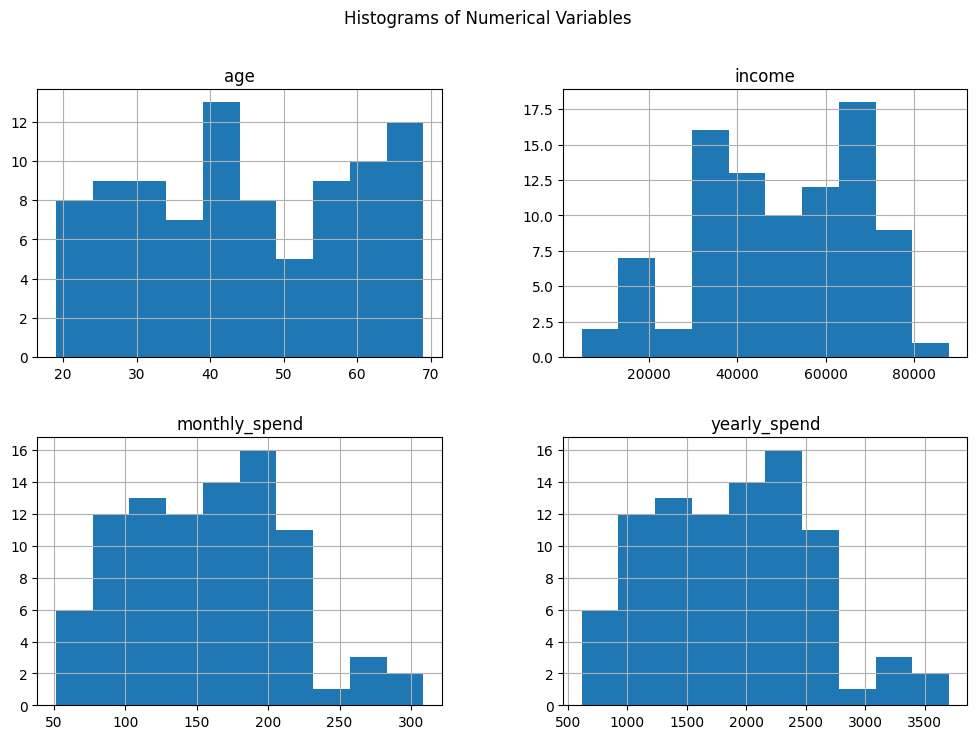

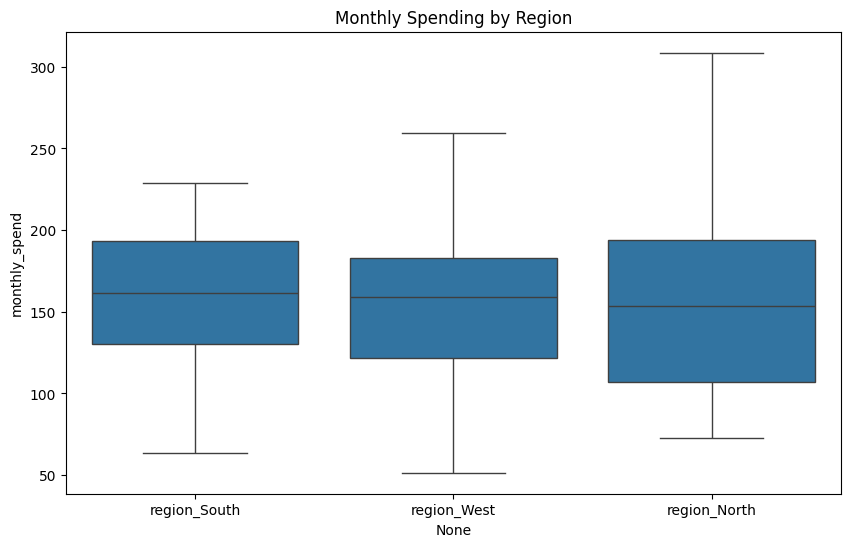

In [6]:
# Histogram of numerical variables
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Variables")
plt.show()
#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df.filter(like="region_").idxmax(axis=1), y=df["monthly_spend"])
plt.title("Monthly Spending by Region")
plt.show()

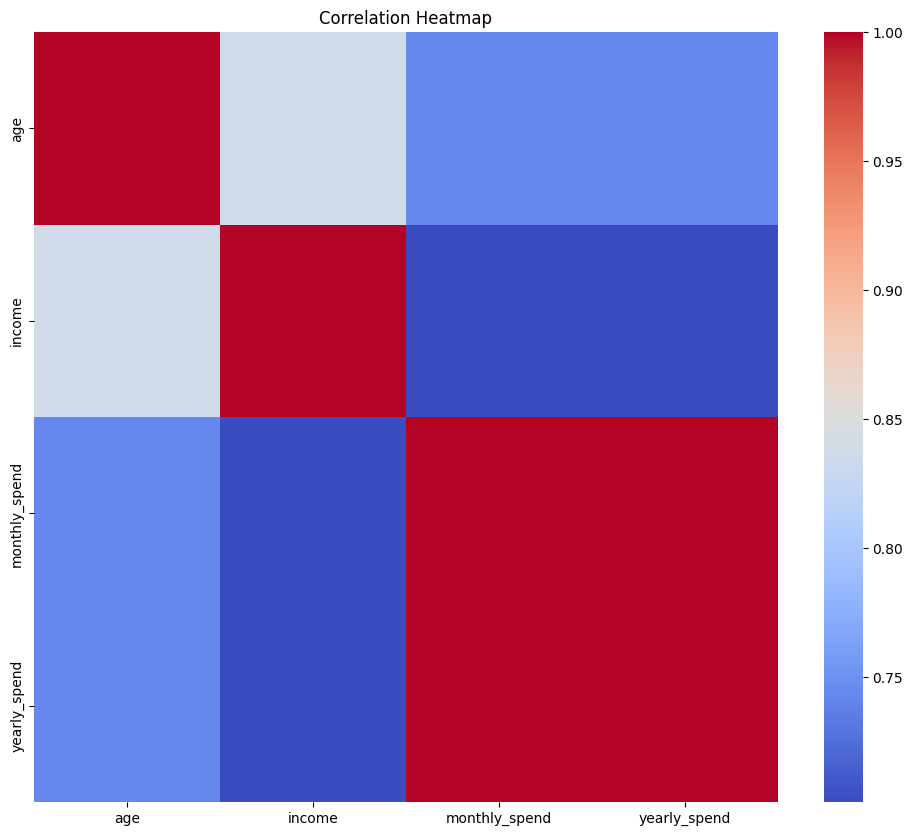

In [7]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(12, 10))

numeric_df = df.select_dtypes(include=["float", "int"])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

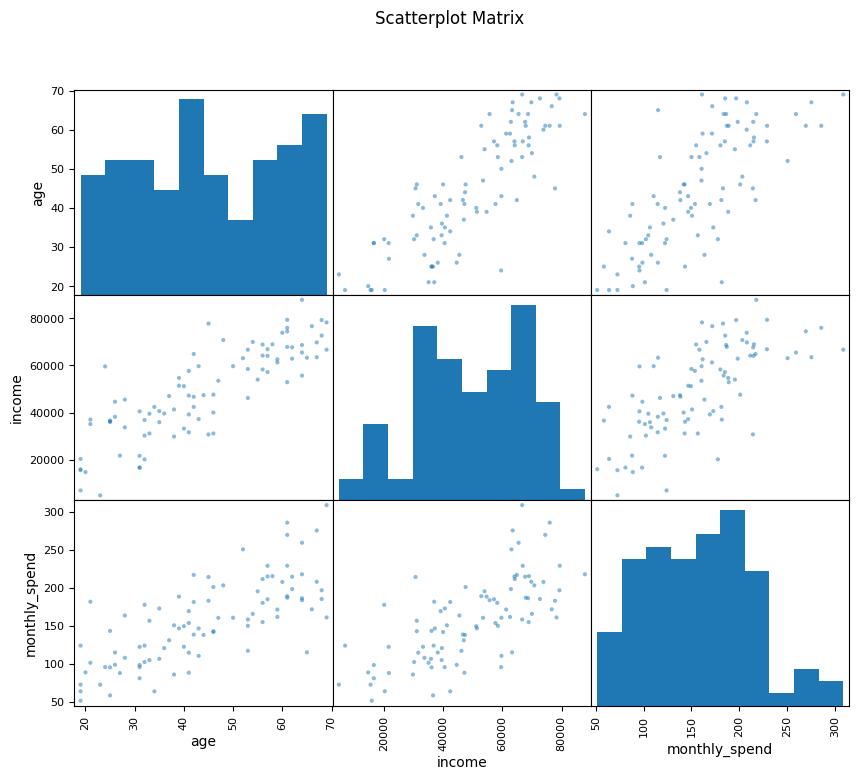

In [8]:
scatter_matrix(df[["age", "income", "monthly_spend"]], figsize=(10, 8))
plt.suptitle("Scatterplot Matrix")
plt.show()

In [9]:
# 1. Ensure target is numeric
y = pd.to_numeric(df["monthly_spend"], errors="coerce")

# 2. Create predictor matrix by selecting ONLY numeric columns
X = df.select_dtypes(include=["number"]).drop(columns=["monthly_spend"], errors="ignore")

# 3. Drop rows where y is NaN
valid_idx = y.dropna().index
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# 4. Drop any rows with NaN in predictors
X = X.dropna()
y = y.loc[X.index]

# 5. Add intercept
X = sm.add_constant(X)

# 6. Fit model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          monthly_spend   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.583e+30
Date:                Thu, 22 Jan 2026   Prob (F-statistic):               0.00
Time:                        21:13:07   Log-Likelihood:                 2490.1
No. Observations:                  90   AIC:                            -4972.
Df Residuals:                      86   BIC:                            -4962.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.197e-14   8.28e-14      0.386   